In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt

from astropy.stats import sigma_clip

import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from plotting import barChartPlot, surfacePlot
from lassiAnalysis import extractZernikesLeicaScanPair
from zernikies import getZernikeCoeffs, getZernikeCoeffsOLS

In [3]:
def extractZernikesLeicaScanPairSummary(refScanFile, sigScanFile, n=512,
                                        pFitGuess=[60., 0., 0., -50., 0., 0.], rMaskRadius=49.,
                                        nZern=36, expected=[], **kwargs):
    
    x,y,dz0,fl = extractZernikesLeicaScanPair(refScanFile, sigScanFile, n=n, nZern=nZern, 
                                         pFitGuess=pFitGuess, rMaskRadius=rMaskRadius,
                                         **kwargs)
    
    # Plot a bar chart with the recovered and expected values.
    barChartPlot(np.arange(1,36), np.asarray(fl[1:36])*1e6, expected=expected[1:36])
    # Show surface deformation map.
    surfacePlot(x, y, dz0, vMin=-5e-4, vMax=5e-4)
    
    return fl

In [4]:
path = "/home/scratch/psalas/LASSI/gpus/output/March2020"
path = "/home/scratch/psalas/LASSI/gpus/output"

<IPython.core.display.Javascript object>


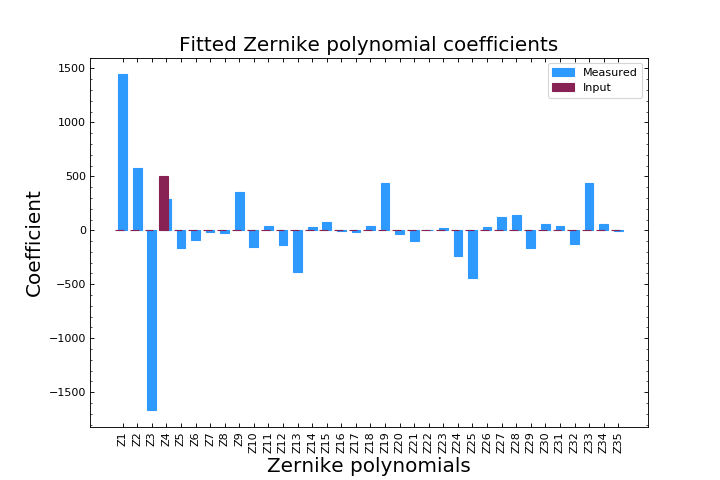

<IPython.core.display.Javascript object>


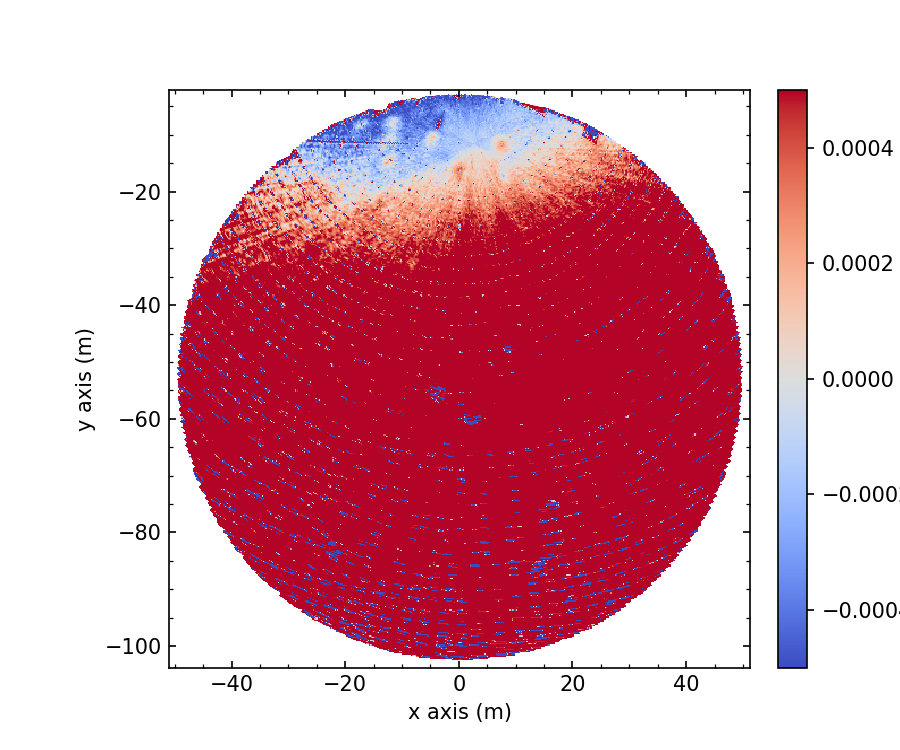

292.0932857628631 -41.697946953520336


In [12]:
refScanFile = "{0}/2020_03_16_05:22:24.ptx.csv".format(path)
sigScanFile = "{0}/2020_03_16_02:28:31.ptx.csv".format(path)
x,y,dz,fl = extractZernikesLeicaScanPair(refScanFile, sigScanFile, n=512, nZern=36, 
                                         pFitGuess=[60., 0., 0., -50., 0., 0.], rMaskRadius=50.,
                                         **{'sigma':15}, signal_registration=False)
# What are we expecting?
# Based on the active surface fits file.
iz = 4
expected = np.zeros(37)
expected[iz] = 501.
# Plot a bar chart with the recovered and expected values.
barChartPlot(np.arange(1,36), np.asarray(fl[1:36])*1e6, expected=expected[1:36])
# Show surface deformation map.
surfacePlot(x, y, dz.T, vMin=-5e-4, vMax=5e-4)
print(fl[iz]*1e6, (fl[iz]*1e6-expected[iz])/expected[iz]*100.)

<IPython.core.display.Javascript object>


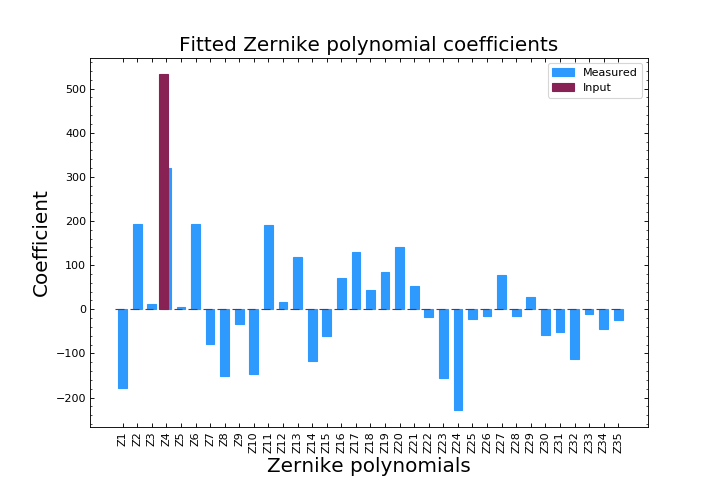

<IPython.core.display.Javascript object>


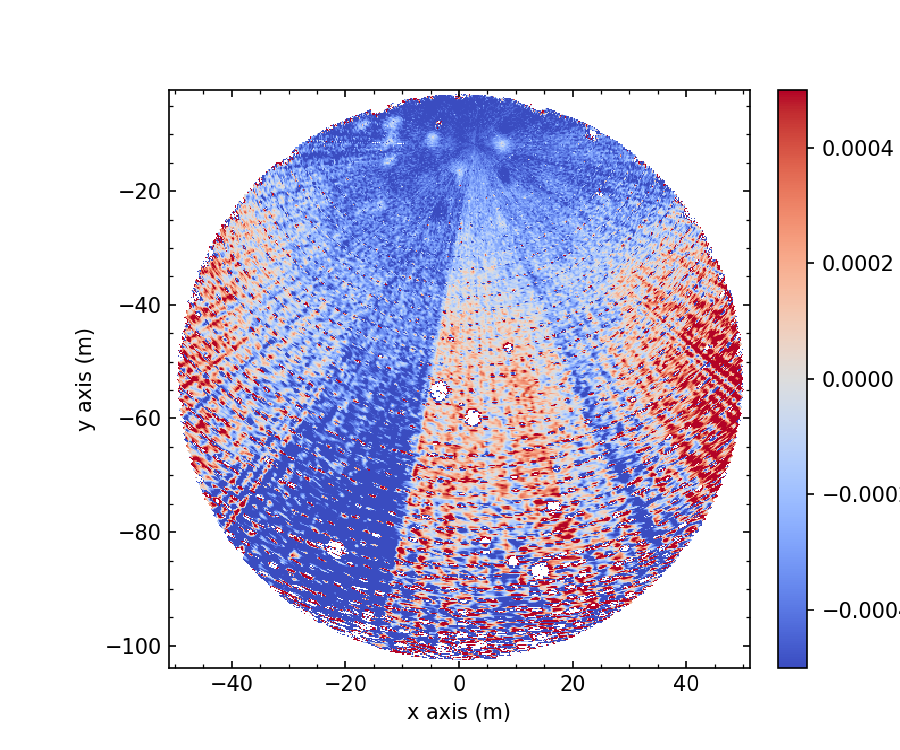

In [8]:
dz_ = sigma_clip(dz, sigma=5)
fl_ = getZernikeCoeffs((dz_).filled(0), 36, norm='active-surface')
barChartPlot(np.arange(1,36), np.asarray(fl_[1:36])*1e6, expected=expected[1:36])
surfacePlot(x, y, dz_, vMin=-5e-4, vMax=5e-4)

<IPython.core.display.Javascript object>


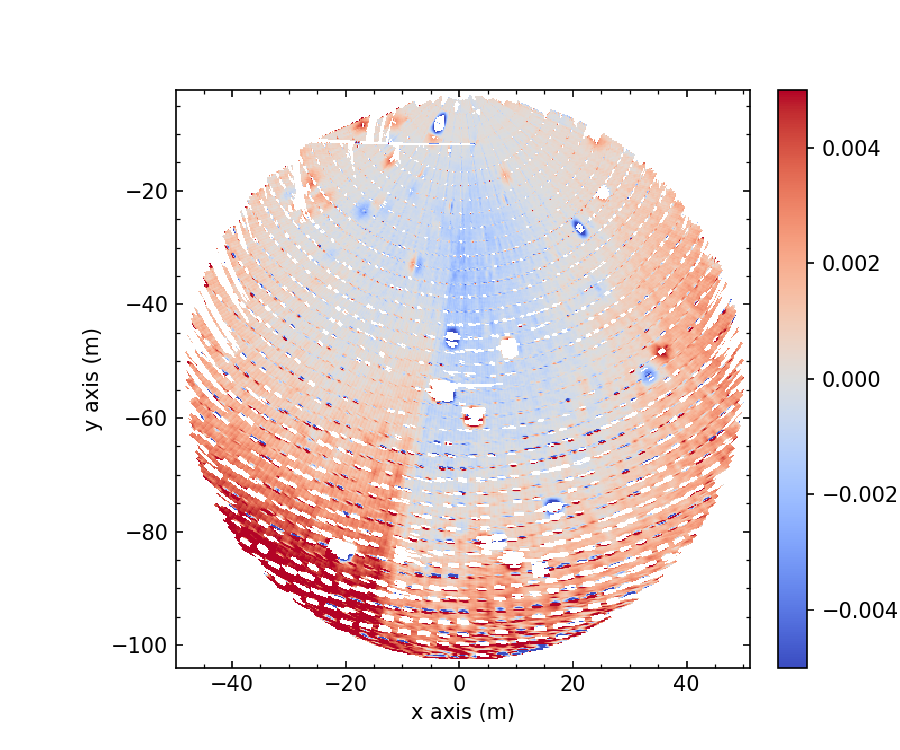

In [36]:
refScanFile = "/home/scratch/psalas/LASSI/gpus/output/409_2019-10-10_23:43:48.ptx.csv"
sigScanFile = "{0}/2020_03_16_04:16:39.ptx.csv".format(path)
x,y,dz,fl_sig = extractZernikesLeicaScanPair(refScanFile, sigScanFile, n=512, nZern=36, 
                                         pFitGuess=[60., 0., 0., -50., 0., 0.], rMaskRadius=50.,
                                         **{'sigma':3})

# Show surface deformation map.
surfacePlot(x, y, dz, vMin=-5e-3, vMax=5e-3)

<IPython.core.display.Javascript object>


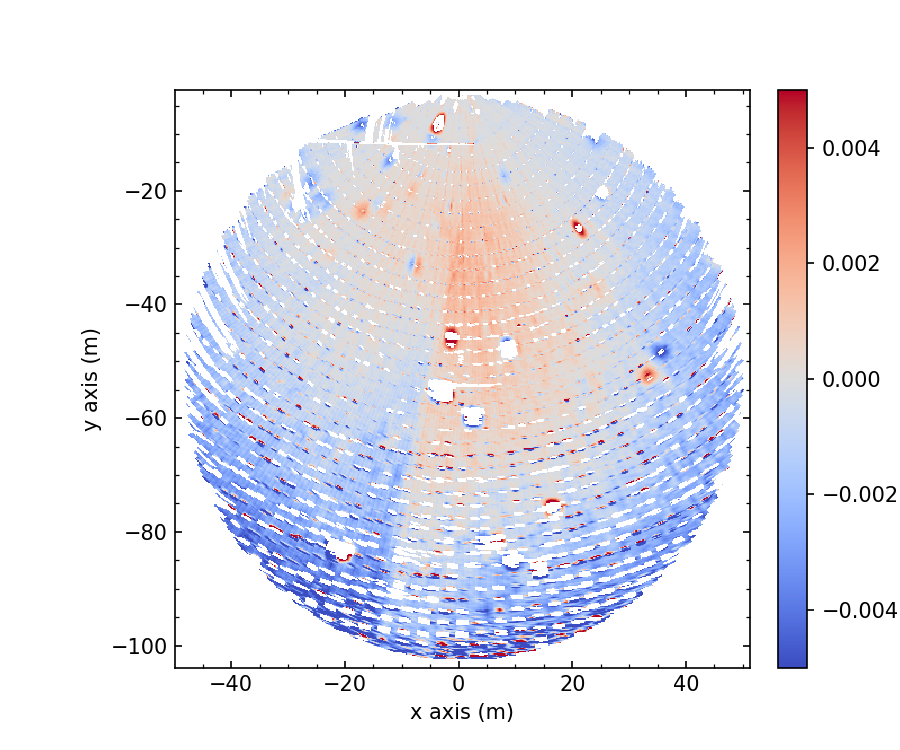

In [33]:
refScanFile = "/home/scratch/psalas/LASSI/gpus/output/409_2019-10-10_23:43:48.ptx.csv"
sigScanFile = "/home/scratch/psalas/LASSI/gpus/output/2020_03_16_04:09:06.ptx.csv"
x,y,dz,fl_ref = extractZernikesLeicaScanPair(sigScanFile, refScanFile, n=512, nZern=36, 
                                         pFitGuess=[60., 0., 0., -50., 0., 0.], rMaskRadius=50.,
                                         **{'sigma':3}, signal_registration=True)
# Show surface deformation map.
surfacePlot(x, y, dz, vMin=-5e-3, vMax=5e-3)

In [35]:
(np.array(fl_sig) - np.array(fl_ref))[7]

0.0008201082659738458

In [32]:
fl_sig[7]*1e6

659.9004439428239

In [34]:
fl_ref[7]*1e6

-160.20782203102178

In [39]:
from simulateSignal import zernikePoly
from utils.utils import midPoint

In [40]:
zp = zernikePoly(x, y, midPoint(x), midPoint(y), fl_sig)

<IPython.core.display.Javascript object>


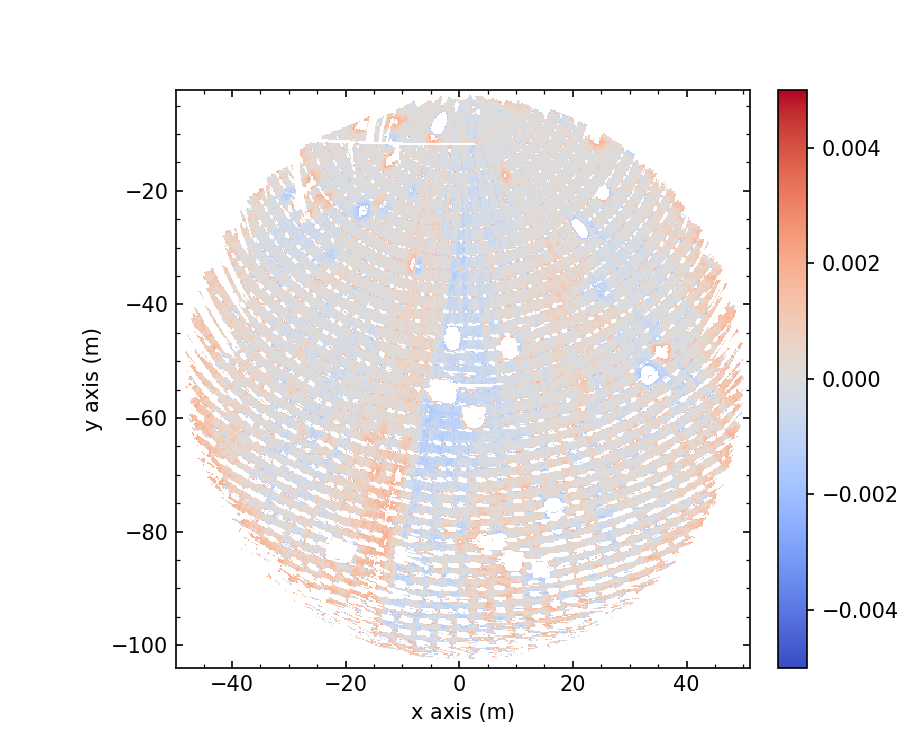

In [42]:
surfacePlot(x, y, sigma_clip(dz-zp), vMin=-5e-3, vMax=5e-3)

<IPython.core.display.Javascript object>


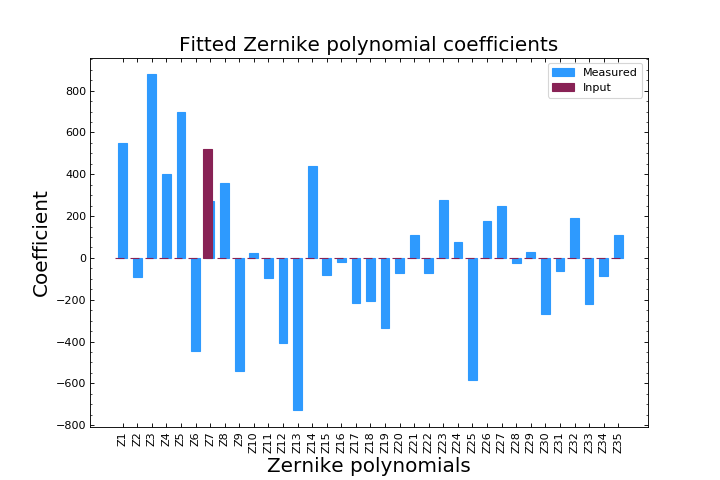

<IPython.core.display.Javascript object>


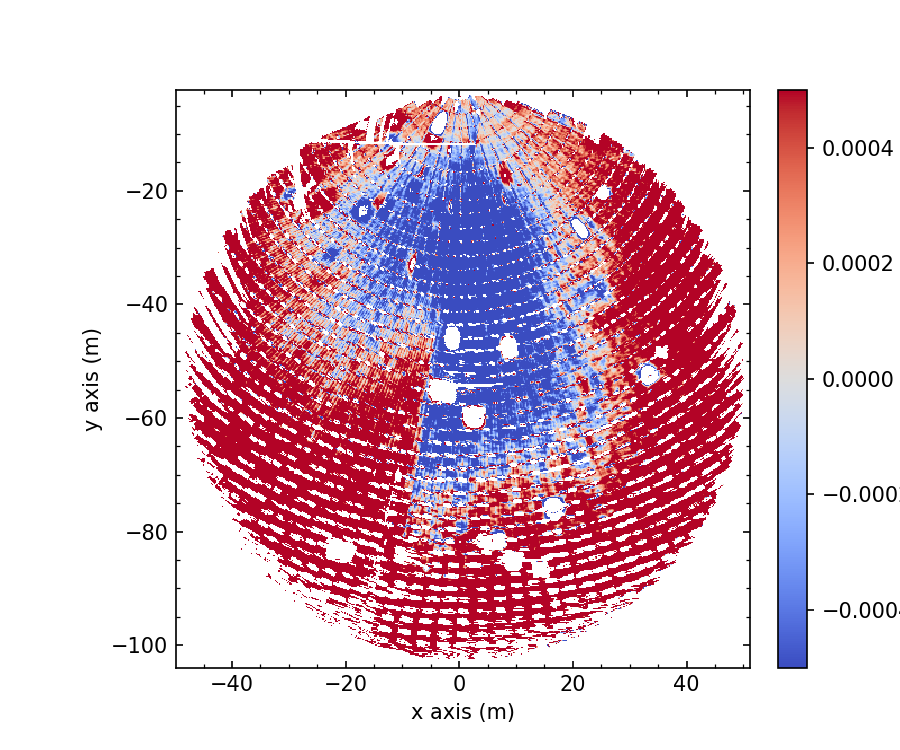

In [47]:
dz0_ = sigma_clip(dz-zp)
dz__ = np.ma.masked_where(dz0_.mask, dz)
fl_ = getZernikeCoeffs((dz__).filled(0), 36, norm='active-surface')
expected = np.zeros(36)
expected[7] = 523.03761456
barChartPlot(np.arange(1,36), np.asarray(fl_[1:36])*1e6, expected=expected[1:36])
surfacePlot(x, y, dz__, vMin=-5e-4, vMax=5e-4)

In [48]:
fl_[7]*1e6

272.60588913171154